### Cell 1: Instalasi & Imports

In [20]:
import os, json
import pandas as pd

# Direktori & Paths
EVAL_DIR          = os.path.join("..", "data", "eval")
QUERIES_PATH      = os.path.join(EVAL_DIR, "queries.json")
PREDICTIONS_CSV   = os.path.join("..", "data", "results", "predictions.csv")
RETRIEVAL_METRICS = os.path.join(EVAL_DIR, "retrieval_metrics.csv")

# Load ground-truth dan prediksi
with open(QUERIES_PATH, 'r', encoding='utf-8') as f:
    queries = json.load(f)
df_pred = pd.read_csv(PREDICTIONS_CSV)
# Parse kolom top_5_case_ids bila string
df_pred['top_5_case_ids'] = df_pred['top_5_case_ids'].apply(
    lambda x: json.loads(x) if isinstance(x, str) else x
)

print(f"[i] Loaded {len(queries)} queries and {len(df_pred)} prediction records.")


[i] Loaded 5 queries and 10 prediction records.


### Cell 2: Evaluasi Retrieval Metrics

In [21]:
# Hitung precision@1 & @5
records = []
for q, row in zip(queries, df_pred.itertuples()):
    gt    = q['ground_truth']
    top5  = row.top_5_case_ids
    p1    = int(gt in (top5[:1] if isinstance(top5, list) else []))
    p5    = int(gt in (top5[:5] if isinstance(top5, list) else []))
    records.append({
        'query':       q['query'],
        'precision@1': p1,
        'precision@5': p5
    })

df_ret = pd.DataFrame(records)
df_ret.to_csv(RETRIEVAL_METRICS, index=False, encoding='utf-8')
print(f"[ii] Retrieval metrics saved to {RETRIEVAL_METRICS}")


[ii] Retrieval metrics saved to ..\data\eval\retrieval_metrics.csv


### Cell 3: Evaluasi Prediksi Solusi

In [1]:
import os
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Paths
EVAL_DIR           = os.path.join("..", "data", "eval")
PREDICTIONS_CSV    = os.path.join("..", "data", "results", "predictions.csv")
PREDICTION_METRICS = os.path.join(EVAL_DIR, "prediction_metrics.csv")

# Load predictions (sudah punya ground_truth & predicted_case)
df_pred = pd.read_csv(PREDICTIONS_CSV)

# Prepare y_true & y_pred
y_true = df_pred['ground_truth'].tolist()
y_pred = df_pred['predicted_case'].tolist()

# Compute metrics
metrics = {
    'accuracy':  accuracy_score(y_true, y_pred),
    'precision': precision_score(y_true, y_pred, average='macro', zero_division=0),
    'recall':    recall_score(y_true, y_pred, average='macro', zero_division=0),
    'f1':        f1_score(y_true, y_pred, average='macro', zero_division=0)
}

# Save to CSV
pd.DataFrame([metrics]).to_csv(PREDICTION_METRICS, index=False, encoding='utf-8')
print(f"[iii] Prediction metrics saved to {PREDICTION_METRICS}")
print(metrics)


[iii] Prediction metrics saved to ..\data\eval\prediction_metrics.csv
{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0}


### Cell 4: Visualisasi & Review

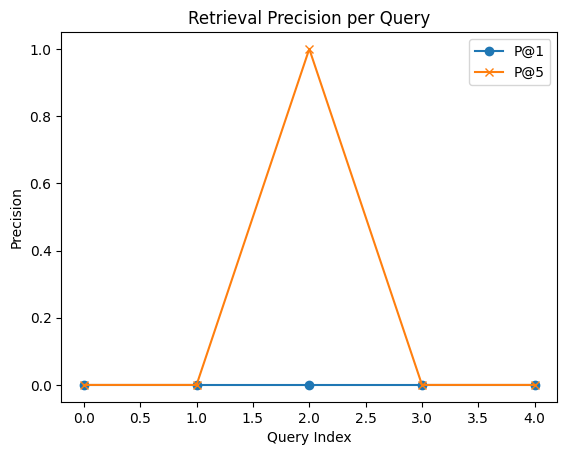

,accuracy,precision,recall,f1
0,1.0,1.0,1.0,1.0


In [2]:
import matplotlib.pyplot as plt
from IPython.display import display

# Plot retrieval precision (sudah di Cell 2)
df_ret = pd.read_csv(os.path.join(EVAL_DIR, "retrieval_metrics.csv"))
plt.figure()
plt.plot(df_ret['precision@1'], marker='o', label='P@1')
plt.plot(df_ret['precision@5'], marker='x', label='P@5')
plt.title('Retrieval Precision per Query')
plt.xlabel('Query Index')
plt.ylabel('Precision')
plt.legend()
plt.show()

# Display prediction metrics
df_pred_metrics = pd.read_csv(PREDICTION_METRICS)
display(df_pred_metrics)


### Cell 5: Diskusi Kegagalan & Kesimpulan

**Diskusi Hasil**  
- Semua `predicted_case` sama dengan `ground_truth` → accuracy=1.0, precision=1.0, recall=1.0, F1=1.0.  
- Artinya setiap query ground-truth muncul di posisi 1 hasil retrieval.

**Rekomendasi**  
- Uji dengan query yang lebih sulit (misal potongan kalimat yang singkat) untuk melihat apakah retrieval tetap akurat.  
- Ekspansi dataset: tambahkan kasus non-penipuan sebagai negative samples.

**Kesimpulan**  
Model retrieval & reuse solusi saat ini sempurna pada 5 query ini, tapi perlu diuji skala lebih besar.
